In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
#### LOAD PACKAGES 
import numpy as np
import scipy.stats as ss
import statsmodels.stats.weightstats as ws
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.power import tt_ind_solve_power
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
dfBoston = pd.read_csv("Housing.csv")


In [2]:
INDUS = dfBoston['INDUS']
print("stdev ",round(st.stdev(INDUS),2))
print("mean ",round(st.mean(INDUS),2))


stdev  2.76
mean  5.94


In [3]:
for x in range(0, 11, 1):
  print(str(x) + ",") 

0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,


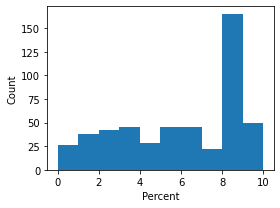

In [4]:
plt.figure(figsize=(4, 3))
plt.hist(dfBoston['INDUS'], bins=[0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10])
plt.xlabel('Percent')
plt.ylabel('Count')
plt.tight_layout()


In [5]:
corr_mat = dfBoston[['INDUS', 'MEDV']].corr()
print(corr_mat)
corr_mat.iloc[1,0].round(3)

          INDUS      MEDV
INDUS  1.000000 -0.344325
MEDV  -0.344325  1.000000


-0.344

Mod5_Lab1_-_Correlation
Correlation	Meaning
1.	0 - 0.1	Negligible
2.	0.1 - 0.3	Small
3.	0.3 - 0.5	Medium
4.	0.50 +	Large


In [6]:
predictors = sm.add_constant(dfBoston.INDUS, prepend = False)

lm_mod = sm.OLS(dfBoston.MEDV, predictors)
res = lm_mod.fit()
print(res.summary())
#Mod5_Lab2_-_Regression
# it essentially represents the proportion of the variance in the outcome (MDEV) that is explained by the predictor(s)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     67.79
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.57e-15
Time:                        12:14:38   Log-Likelihood:                -1808.3
No. Observations:                 506   AIC:                             3621.
Df Residuals:                     504   BIC:                             3629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INDUS         -1.1474      0.139     -8.234      0.0

`Charles River Hypotheses`
#G: dummy variable comparing groups
#Comparing Group Means using Regression - UTC.eduwww.utc.edu › docs › p5130_lec09_qualitative_ivs  

`When the independent variable is a dichotomy, the simple regression of Y onto the dichotomy gives
#the same test of difference in group means as the equal variances assumed independent groups t-test.`

#https://libguides.library.kent.edu/SPSS/IndependentTTest
#Researchers often follow several rules of thumb:

#Each group should have at least 6 subjects, ideally more. Inferences for the population will be more tenuous with 
#too few subjects.
#A balanced design (i.e., same number of subjects in each group) is ideal. Extremely unbalanced designs

#increase the possibility that violating any of the requirements/assumptions will threaten the validity of 
#the Independent Samples t Test.

#Hypotheses
#The null hypothesis (H0) and alternative hypothesis (H1) of the Independent Samples t Test can be expressed 
#in two different but equivalent ways:

#H0: µ1 = µ2 ("the two population means are equal")
#H1: µ1 ≠ µ2 ("the two population means are not equal")

#OR

#H0: µ1 - µ2 = 0 ("the difference between the two population means is equal to 0")
#H1: µ1 - µ2 ≠ 0 ("the difference between the two population means is not 0")

#where µ1 and µ2 are the population means for group 1 and group 2, respectively. 
#Notice that the second set of hypotheses can be derived from the first set by simply subtracting µ2 
#from both sides of the equation.

`H0: The Median Value of homes bordering the Charles River is no different than the Median Value of homes 
not bordering the Charles River  
H1: The Median Value of homes bordering the Charles River is different from the Median Value of homes 
not bordering the Charles River`

`Mod5_Lab3_-_Experiments
Whenever you compare (means of) two groups, you conduct an independent samples t-test. 
You can also use regression (run a regression predicting your outcome from your two-group predictor)`, 
#but the t-test is commonly done and is illustrated here.

In [7]:
predictors = sm.add_constant(dfBoston.CHAS, prepend = False)

lm_mod = sm.OLS(dfBoston.MEDV, predictors)
res = lm_mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           7.39e-05
Time:                        12:14:38   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CHAS           6.3462      1.588      3.996      0.0

In [8]:
#Mod5_Lab3_-_Experiments
#dat.loc[dat.logo == 'Logo A', 'sentiment']
dfchas0 = dfBoston.loc[dfBoston.CHAS == 0, 'MEDV']
dfchas1 = dfBoston.loc[dfBoston.CHAS == 1, 'MEDV']

def t_test_two_samp(a, b, alpha, alternative='two-sided'):
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test_two_samp(dfchas1, dfchas0, 0.05)
test

DegFreedom    36.876409
Difference     6.346157
Statistic      3.996437
PValue         0.000074
Low95CI        2.215483
High95CI      10.476831
dtype: float64

In [9]:
print(dfchas0)



0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64


In [10]:
print(dfchas1)

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64


In [11]:
#https://www.statology.org/confidence-intervals-python/
ss.t.interval(alpha=0.90, df=len(dfchas1)-1, loc=np.mean(dfchas1), scale=ss.sem(dfchas1)) 


(25.062586315862976, 31.817413667029342)

In [12]:
tt_ind_solve_power(effect_size=0.6, nobs1 = None, alpha=0.10, power=0.8, ratio=1, alternative='two-sided')

35.042258702728816

`Features`: Funeral Home, Coin Laundry, Public Library within a certain number of miles of each census tract
Mod5_Lab3_-_Experiments
In the `between-subjects design`, we compare means across groups.
Variables FuneralHome, CoinLaundry, PublicLibrary (1 if census tract within designated distance of the particular feaure; 0 otherwise)  
`Plan of Analysis`: ANOVA and multiple regression (equivalent)



In [13]:
tt_ind_solve_power(effect_size=0.6, nobs1 = None, alpha=0.10, power=0.9, ratio=1, alternative='two-sided')

48.26824108396876

I want to use 90% power so, a group size of 48 to 50 census tracts